In [6]:
from datetime import datetime
import MetaTrader5 as mt5
import pytz
import pandas as pd

print("MetaTrader5 package author: ", mt5.__author__)
print("MetaTrader5 package version: ", mt5.__version__)

# establish connection to MetaTrader 5 terminal
if not mt5.initialize():
    raise Exception("initialize() failed, error code =",mt5.last_error())

# set time zone to UTC
timezone = pytz.timezone("Etc/UTC")

# create 'datetime' objects in UTC time zone to avoid the implementation of a local time zone offset
utc_from = datetime(2020, 1, 1, tzinfo=timezone)
utc_to = datetime(2024, 1, 1, tzinfo=timezone)

tickers = [
    'USDJPY',
    'EURUSD',
    'AUDUSD',
    'USDCHF',
    'GBPUSD',
    'USDCAD',
    "USDTRY",  # Dólar estadounidense  Lira turca
    "USDZAR",  # Dólar estadounidense  Rand sudafricano
    "USDBRL",  # Dólar estadounidense  Real brasileño
    "USDMXN",  # Dólar estadounidense  Peso mexicano
    "USDSGD",  # Dólar estadounidense  Dólar de Singapur
    "USDHKD",  # Dólar estadounidense  Dólar de Hong Kong
    "USDTHB",  # Dólar estadounidense  Baht tailandés
    "USDRUB",  # Dólar estadounidense  Rublo ruso
    "EURTRY",  # Euro  Lira turca
    "EURZAR"   # Euro  Rand sudafricano
]

symbols = {}
for ticker in tickers:
    rates = mt5.copy_rates_range(ticker, mt5.TIMEFRAME_D1, utc_from, utc_to)
    df = pd.DataFrame(rates)

    # convert time in seconds into the datetime format
    df['time'] = pd.to_datetime(df['time'], unit='s')
                            
    df = df.rename(columns={
        'time':'Date', 
        'open':'Open', 
        'high':'High', 
        'low':'Low', 
        'close':'Close', 
        'tick_volume':'Volume'
    })

    symbols[ticker] = df

mt5.shutdown()


MetaTrader5 package author:  MetaQuotes Ltd.
MetaTrader5 package version:  5.0.4288


True

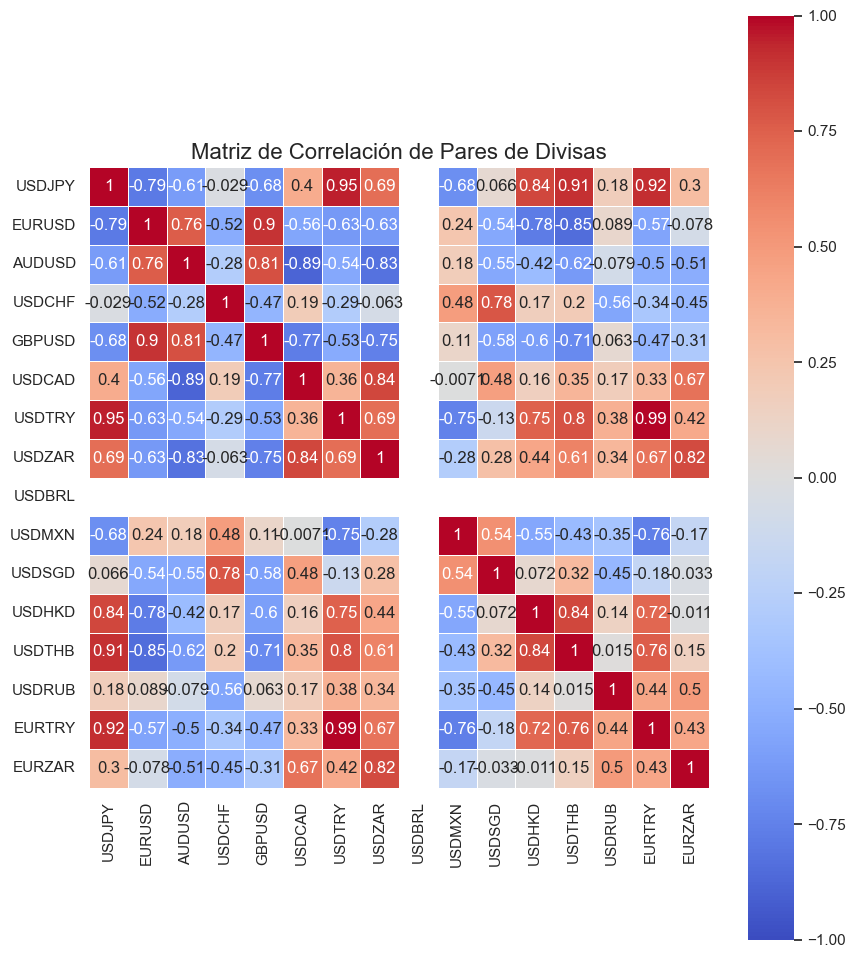

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo de datos: precios de cierre de pares de divisas

data = {}
for ticker, df in symbols.items():

    data[ticker] = df.Close

df = pd.DataFrame(data)
corr_matrix = df.corr()
sns.set_theme(style='white')
plt.figure(figsize=(10, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, square=True)
plt.title('Matriz de Correlación de Pares de Divisas', fontsize=16)
plt.show()
